In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reading our's datasets

In [3]:
df_2d = pd.read_csv('data/data_2d.csv')
df_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [4]:
df_mnist = pd.read_csv('data/mnist.csv')
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Part 1__

In this task, you need to download this dataset. Here you will find 2 files - with a two-dimensional dataset and the MNIST dataset. For each of them, apply the K-means algorithm for clustering. To find the optimal number of clusters, use the elbow method.

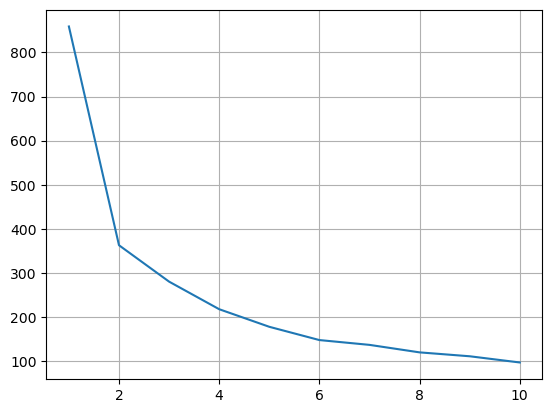

In [5]:
distortions = []
for i in range(1, 11):
    clusters = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(df_2d)
    distortions.append(clusters.inertia_)
plt.grid()
plt.plot(range(1, 11), distortions)
plt.show()

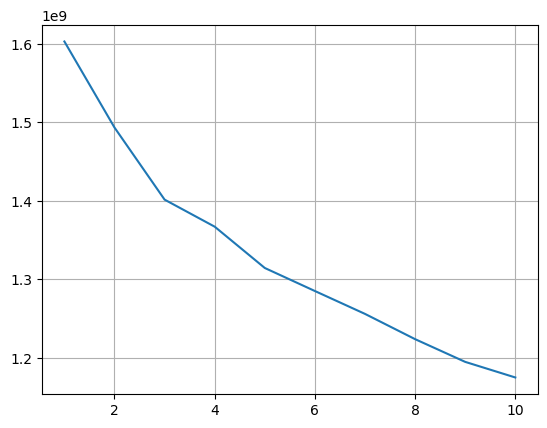

In [6]:
distortions_mnist = []
for i in range(1, 11):
    clusters = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(df_mnist)
    distortions_mnist.append(clusters.inertia_)
plt.grid()
plt.plot(range(1, 11), distortions_mnist)
plt.show()

__Part 2__

Visualize the results of the clustering. For the case with the MNIST dataset, you need to use the PCA algorithm to reduce the dimensionality of your data to a 2-dimensional variant.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

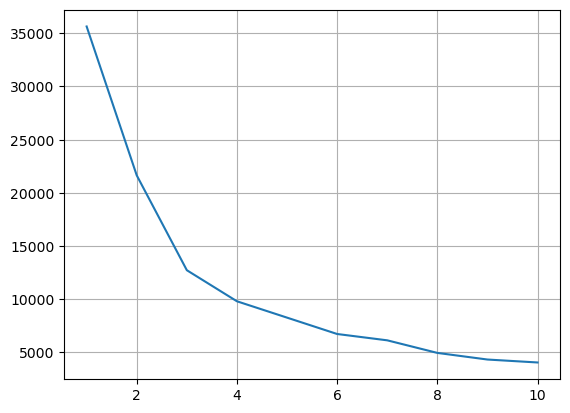

In [8]:
base_scaler = StandardScaler()
scale = base_scaler.fit_transform(df_mnist)

pca = PCA(n_components=2)
new_scale = pca.fit_transform(scale)


distortions = []

for i in range (1,11):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(new_scale)
    distortions.append(km.inertia_)

plt.grid()    
plt.plot(range(1, 11), distortions)
plt.show()

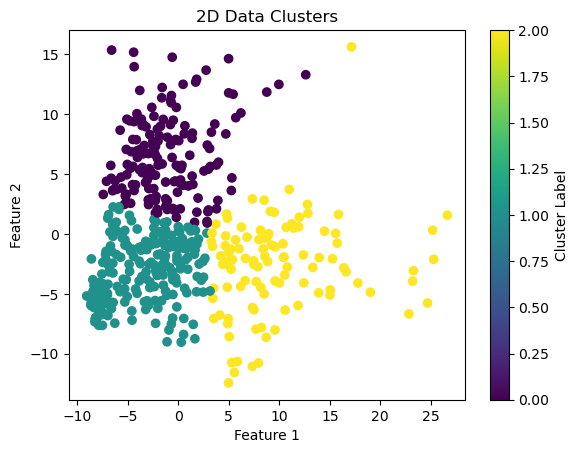

In [9]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(new_scale)
labels = kmeans.labels_

plt.scatter(new_scale[:, 0], new_scale[:, 1], c=labels)
plt.title('2D Data Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()